# **The Sparks Foundation**

# **GRIP October 2023**

## **Data Science & Business Analytics**

## **Author: Asad Tariq Sheikh**

## **Task 2: Prediction using Unsupervised ML**

(Level - Beginner)

From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually.

Dataset: https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
import warnings
warnings.filterwarnings("ignore")

# **Importing CSV**

In [2]:
data = pd.read_csv("Iris.csv")

In [3]:
target = data['Species']
label_to_int = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
true_labels_int = target.map(label_to_int)

# **Reading CSV**

In [4]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# **Dropping Columns**

In [8]:
data = data.drop(columns=['Id', 'Species'])

In [9]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# **Algorithm**

# **K-Means Clustering**

# **What will be the value of k?**

We will determine the value of `k` by using `Elbow Method`

In [10]:
cluster_sum_of_square = np.empty((0,))
clusters_range = np.arange(1, 11)

for k in clusters_range:
    model = KMeans(n_clusters=k)
    model.fit(data)
    cluster_sum_of_square = np.append(cluster_sum_of_square, model.inertia_)

# **Elbow Method**

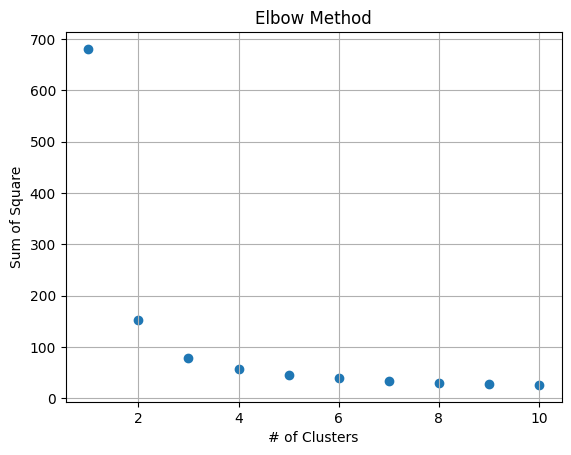

In [11]:
plt.scatter(clusters_range, cluster_sum_of_square)
plt.title('Elbow Method')
plt.xlabel('# of Clusters')
plt.ylabel('Sum of Square')
plt.grid()
plt.show()

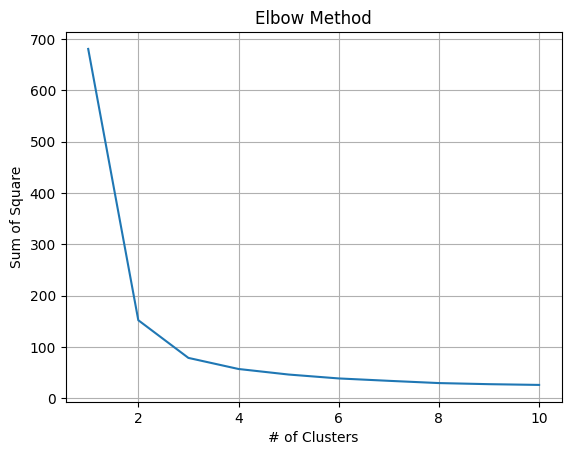

In [12]:
plt.plot(clusters_range, cluster_sum_of_square)
plt.title('Elbow Method')
plt.xlabel('# of Clusters')
plt.ylabel('Sum of Square')
plt.grid()
plt.show()

So the best value would be `k = 3`.

Because we can see, after 3-Clusters `sum of square` value isn't much decreasing

# **Prediction**

We'll configure a K-Means clustering model with `3 clusters`, using `k-means++` initialization, allowing a maximum of `200` iterations per run, performing `10` initializations, and ensuring reproducibility of the initialization using a specific random seed `11`.

In [13]:
model = KMeans(n_clusters = 3, init ='k-means++', max_iter=200, n_init=10, random_state=11)

In [14]:
predictions = model.fit_predict(data)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [15]:
x = data.values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

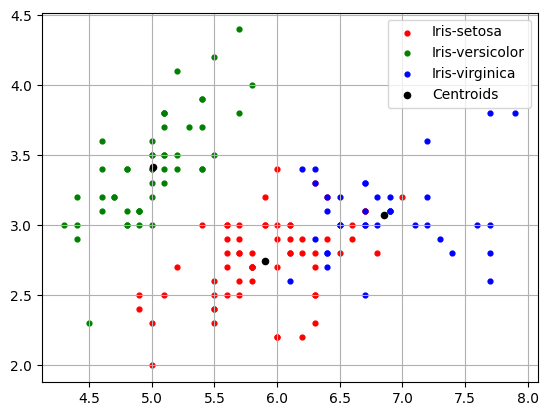

In [16]:
plt.scatter(x[predictions==0,0], x[predictions==0,1], s=12, c='red', label='Iris-setosa')
plt.scatter(x[predictions==1,0], x[predictions==1,1], s=12, c='green', label='Iris-versicolor')
plt.scatter(x[predictions==2,0], x[predictions==2,1], s=12, c='blue', label='Iris-virginica')

plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=20, c='black', label='Centroids')
plt.legend()
plt.grid()
plt.show()

# **Metrics**

In [22]:
ari = adjusted_rand_score(true_labels_int, predictions)
ami = adjusted_mutual_info_score(true_labels_int, predictions)

print("Adjusted Rand Index (ARI):", ari)
print("Adjusted Mutual Information (AMI):", ami)

Adjusted Rand Index (ARI): 0.7302382722834697
Adjusted Mutual Information (AMI): 0.7551191675800485
